In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.style.use('ggplot')

In [2]:
def calc_point_insolation(t, phi, gamma, pi, e):
    # convert inputs from degrees to radians
    phi = phi * (2*np.pi/360.0)
    gamma = gamma * (2*np.pi/360.0)
    pi = pi * (2*np.pi/360.0)
    
    # constants
    Ya = 365.26 # days
    t_VE = 76.0 # days since Jan 1
    S_0 = 1362.0 # W/m^2
    
    # step 1, calculate the mean anomaly at vernal equinox
    beta = np.sqrt(1-e**2)
    M_VE = -pi + (e + e**3/4.0)*(1 + beta)*np.sin(pi)
    
    # step 2, calculate the mean anomaly
    M = (2*np.pi*(t-t_VE))/(Ya) + M_VE
    
    # step 3, calculate the true anomaly
    A = M + (2*e - e**3/4.0)*np.sin(M)
    
    # step 4, calculate the distance to the sun
    d = (1-e**2)/(1+e*np.cos(A))
    
    # step 5, calculate the solar longitude
    L_s = A + pi
    
    # step 6, calculate the declination angle 
    delta = np.arcsin(np.sin(gamma) * np.sin(L_s))
    
    # step 7, calculate the sunrise/sunset angle
    T = np.tan(phi) * np.tan(delta)
    if T >= 1:
        eta_d = np.pi
    elif T <= -1:
        eta_d = 0.0
    else:
        eta_d = np.arccos(-1 * T)
    
    # step 8, calculate the daily averaged cos(zenith angle)
    c1 = eta_d*np.sin(phi)*np.sin(delta)
    c2 = np.cos(phi)*np.cos(delta)*np.sin(eta_d)
    cosbar = (1/np.pi)*(c1+c2)
    
    # step 9, calculate the flux
    F = S_0 * (1.0/d)**2 * cosbar
    return(F)

In [3]:
def calc_day_lat_insolation(n_days,n_lats,gamma,pi,e):
    d_arr = (np.linspace(0,365,num = n_days)).astype(int)
    l_arr = (np.linspace(-90,90,num = n_lats)).astype(int)
    F_arr = np.zeros((n_days,n_lats))
    # loop over days
    for i,day in enumerate(d_arr):
        for j,lat in enumerate(l_arr):
            F_dl = calc_point_insolation(day,lat,gamma,pi,e)
            F_arr[i,j] = F_dl
    return(F_arr)

In [4]:
def plot_day_lat_insolation(n_days,n_lats,F_arr,scmap,stitle):
    d_arr = (np.linspace(0,365,num = n_days)).astype(int)
    l_arr = (np.linspace(-90,90,num = n_lats)).astype(int)
    lats,days = np.meshgrid(l_arr,d_arr)

    f = 18
    plt.figure(figsize=(15,6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1]) 
    
    plt.subplot(gs[0])
    if scmap == 'jet' or scmap == 'YlOrRd':
        vmin, vmax = 0, np.ceil(np.max(F_arr)/100)*100
    else:
        mm = np.ceil(np.max(np.abs(F_arr))/10)*10
        vmin, vmax = -mm, mm

    plt.contourf(days,lats,F_arr,10,cmap=scmap,vmin=vmin,vmax=vmax)
    plt.title(stitle, fontsize=f)
    
    plt.xlabel('Days since Jan 1', fontsize=f)
    plt.xticks(fontsize=f)
    plt.ylabel('Latitude', fontsize=f)
    plt.yticks(fontsize=f)
    cbar = plt.colorbar()
    cbar.set_label('ToA Insolation [W/m$^2$]', fontsize=f)
    cbar.ax.tick_params(labelsize=f)
    plt.clim([vmin,vmax])
    
    plt.subplot(gs[1])
    Fbar = np.mean(F_arr, axis=0)
    plt.plot(Fbar,l_arr,'k-')
    
    plt.xlabel('Average ToA Insolation [W/m$^2$]', fontsize=f)
    min_insol = np.floor(np.min(np.mean(F_arr,axis=0))/10)*10
    max_insol = np.ceil(np.max(np.mean(F_arr,axis=0))/10)*10
    ticks = np.linspace(min_insol, max_insol, 3)
    if np.max(np.mean(F_arr,axis=0)) < 0.5:
          ticks = np.linspace(-0.5, 0.5, 3)    
    plt.xticks(ticks,fontsize=f)
    plt.yticks(visible=False)
    
    plt.tight_layout()
    plt.show()

Question 1

Calculate the insolation as a function of latitude and day of year for present conditions ($\gamma = 23.44 ^\circ$, $\varpi = 282.95 ^\circ$, and $e = 0.017$). 

Question 2

Average the insolation over the year and plot as a function of latitude.

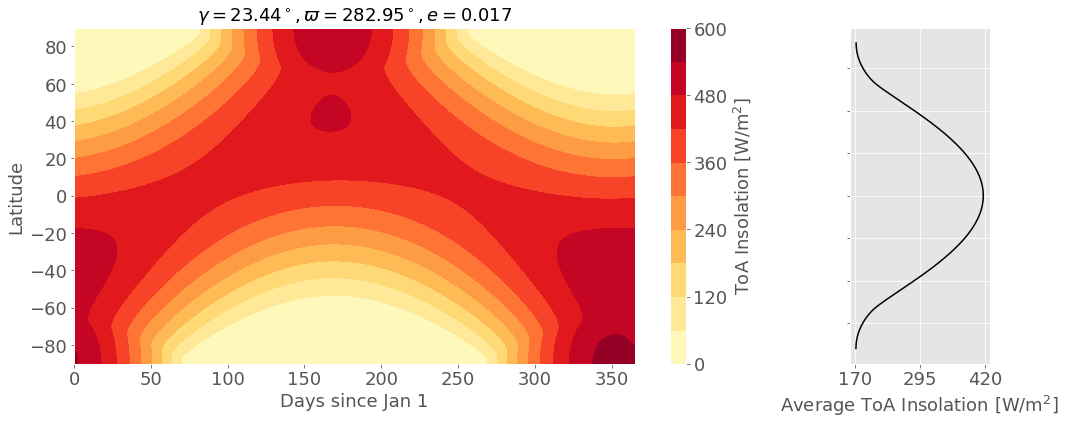

In [5]:
# 2018 constants
gamma0 = 23.44
pi0 = 282.95
e0 = 0.017

# ndays, nlats
ndays = 365
nlats = 180

F0 = calc_day_lat_insolation(ndays,nlats,gamma0,pi0,e0)
plot_day_lat_insolation(ndays,nlats,F0,'YlOrRd',
 '$\gamma = 23.44^\circ, \\varpi = 282.95^\circ, e = 0.017$')

Question 3

3a. Change the perihelion by $180 ^\circ$ (to $\varpi = 102.95 ^\circ$) and make the same plot of insolation as a function of day of the year and latitude and the annual average.

3b. Then make a difference plot of this case compared to the present.

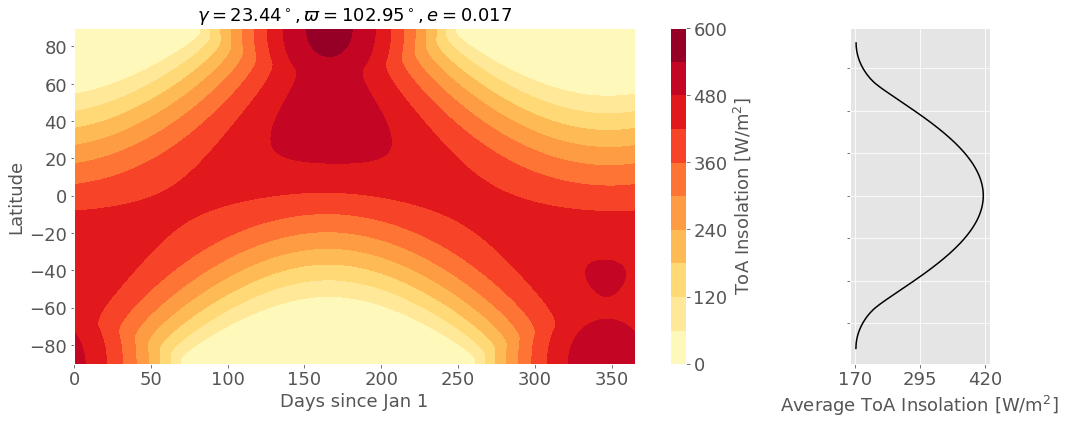

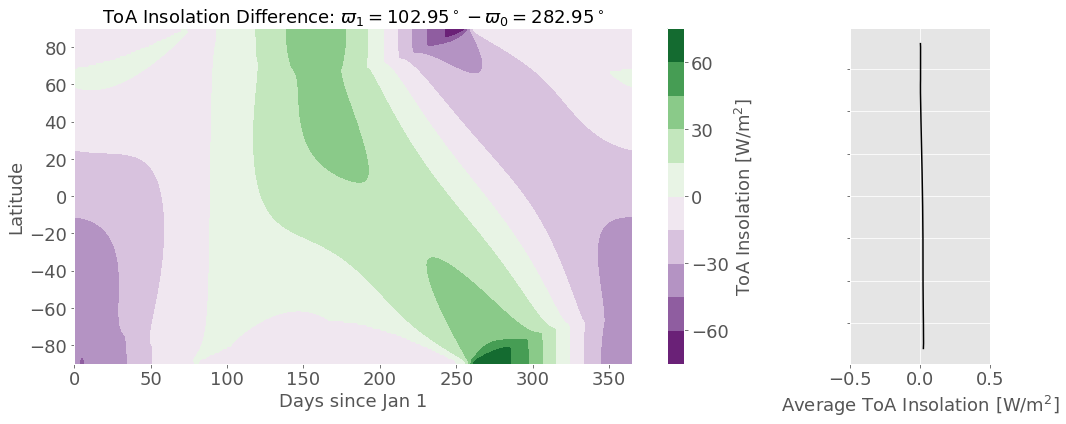

In [6]:
# turn longitude of perihelion by 180°
gamma0 = 23.44
pi1 = 282.95 + 180.0
e0 = 0.017

# ndays, nlats
ndays = 365
nlats = 180

F1 = calc_day_lat_insolation(ndays,nlats,gamma0,pi1,e0)
plot_day_lat_insolation(ndays,nlats,F1,'YlOrRd',
 '$\gamma = 23.44^\circ, \\varpi = 102.95^\circ, e = 0.017$')
plot_day_lat_insolation(ndays,nlats,F1-F0,'PRGn',
 'ToA Insolation Difference: $\\varpi_1 = 102.95^\circ - \\varpi_0 = 282.95^\circ$')

What you change here is to move from a state where the SH summer (when SH is tilted towards the sun) occurs at the perihelion (closest point to sun) to the NH summer ocuring at perihelion; specifically the perihelion occurs now on July 4th instead of January 3rd. This is manifest in the plots by noting that the brightest day/lat now occurs at the south pole during December, but in this new case it occurs at the north pole during June. On the difference plot you can note two things of importance. First, you can see this shift of the longitude of perihelion as an increase in insolation in the NH during summer and decrease in insolation in SH during winter. The largest changes occur in fall - there is a decrease in insolation at the north pole and increase at the south pole. This is because of the asymmetry that the perihelion and the solstice don't line up.
The other thing to note is that while there is a distinctive change in insolation as a function of day, there is no change in the annually averaged insolation at a given latitude. The annually averaged insolation is a not a function of the longitude of perihelion (but as we will see it is a function of the obliquity).

Question 4

4a. Set back to the original value, $\varpi = 282.95 ^\circ$, but decrease the obliquity to $\gamma = 22.0 ^\circ$. Make the same plots of insolation.

4b. Compare this to the present insolation.

4c. Decrease $\gamma$ to $18.0 ^\circ$. Make the same plots.

4d. Compare again to present insolation values.

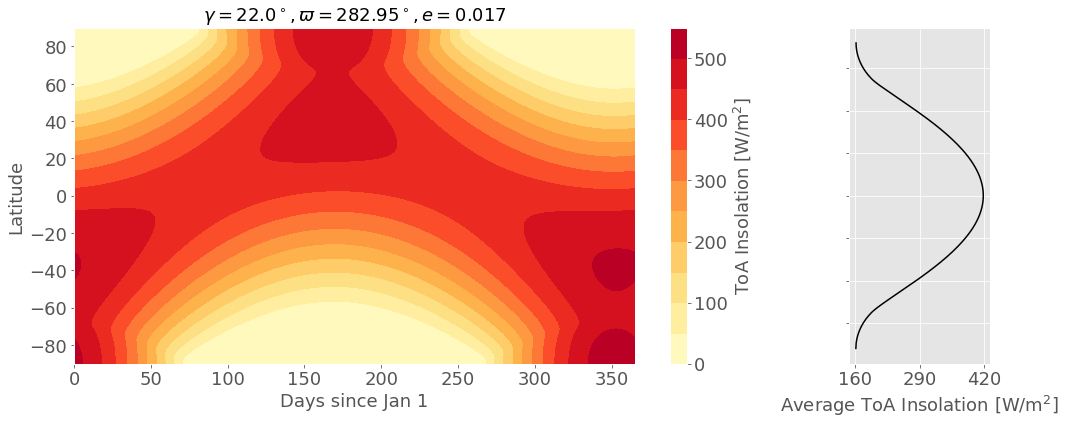

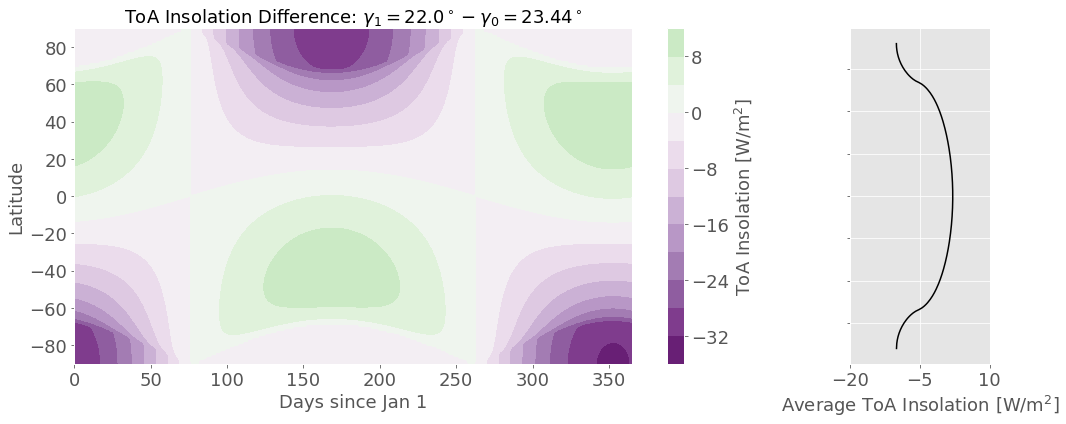

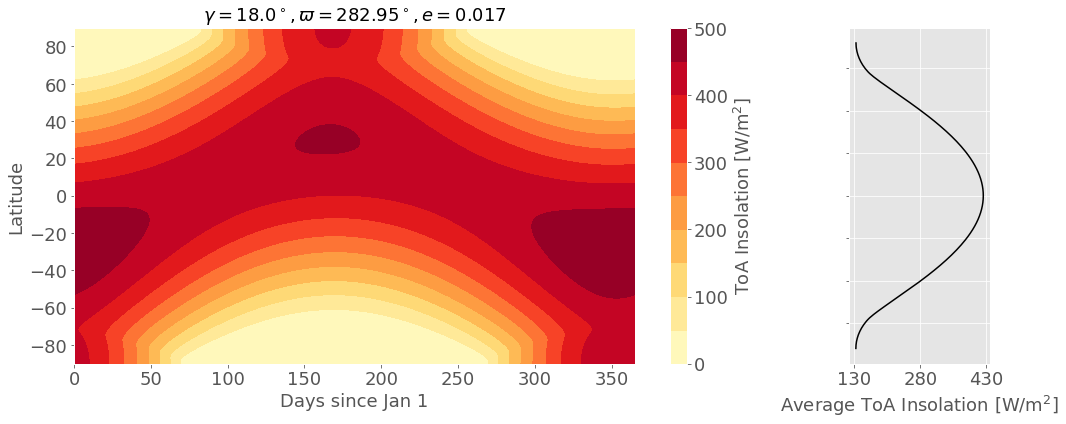

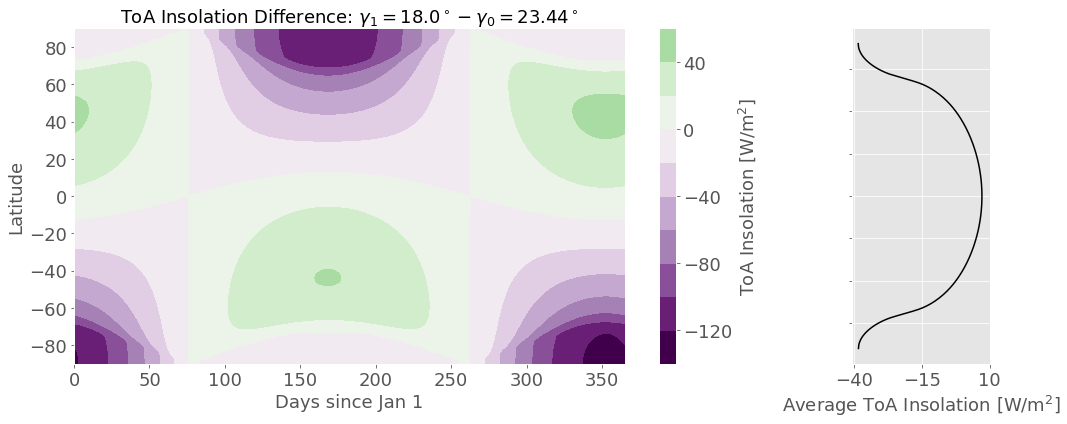

In [7]:
# perihelion back to normal. decrease gamma to 22.0°
gamma1 = 22.0
pi0 = 282.95
e0 = 0.017

# ndays, nlats
ndays = 365
nlats = 180

F2 = calc_day_lat_insolation(ndays,nlats,gamma1,pi0,e0)
plot_day_lat_insolation(ndays,nlats,F2,'YlOrRd',
 '$\gamma = 22.0^\circ, \\varpi = 282.95^\circ, e = 0.017$')
plot_day_lat_insolation(ndays,nlats,F2-F0,'PRGn',
 'ToA Insolation Difference: $\gamma_1 = 22.0^\circ - \gamma_0 = 23.44^\circ$')

# decrease gamma to 18.0°
gamma2 = 18.0
pi0 = 282.95
e0 = 0.017

# ndays, nlats
ndays = 365
nlats = 180

F3 = calc_day_lat_insolation(ndays,nlats,gamma2,pi0,e0)
plot_day_lat_insolation(ndays,nlats,F3,'YlOrRd',
 '$\gamma = 18.0^\circ, \\varpi = 282.95^\circ, e = 0.017$')
plot_day_lat_insolation(ndays,nlats,F3-F0,'PRGn',
 'ToA Insolation Difference: $\gamma_1 = 18.0^\circ - \gamma_0 = 23.44^\circ$')

Decreasing the obliquity decreases the insolation difference between pole and equator - there are fewer latitudes that experience a day without any sun in the winter (or without any night in the summer). The insolation at the poles during respective summers is decreased significantly and the insolation at mid-latitudes during winter is increased slightly. As the obliquity is decreased even further these effects are exagerated. When the obliquity is small enough (18 degrees is enough) the day/lat of maximum insolation moves from the poles to low latitudes in the summer. There is a balance here between the hour angle and the declination angle.

Question 5

Changing the longitude of perihelion probably wouldn't have much of an effect on glacial inception/termination, but it could have a small impact by making summer brighter and winter dimmer in the NH (like shown in this example). If you were able to have a longer/dimmer winter then you could form more ice. Maybe you'd form more ice than you'd melt in your shorter/brighter summer. This would require some type of threshold behavior. And vice versa might happen.

Changing the obliquity could definitely have a big impact. By decreasing the obliquity (as done above) you can decrease the annually averaged insolation at the poles which would mean you could form more ice in the winter and melt less/the same amount in the summer. This could trigger the onset of an ice age. Conversely, if the obliquity increased you would brigten the poles and end an ice age.

Question 6

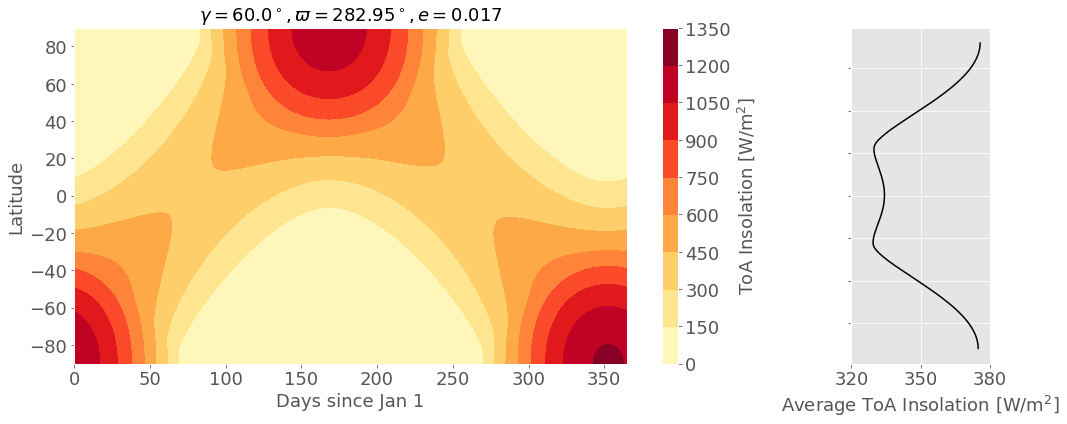

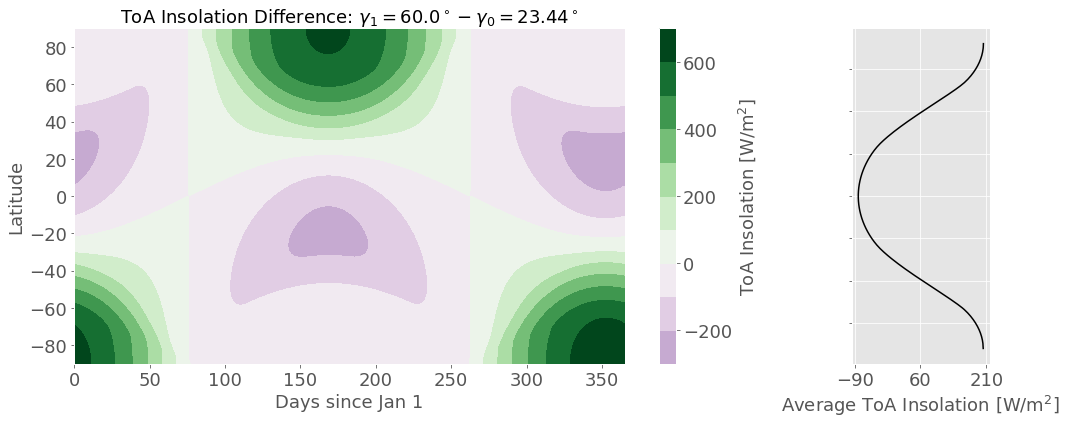

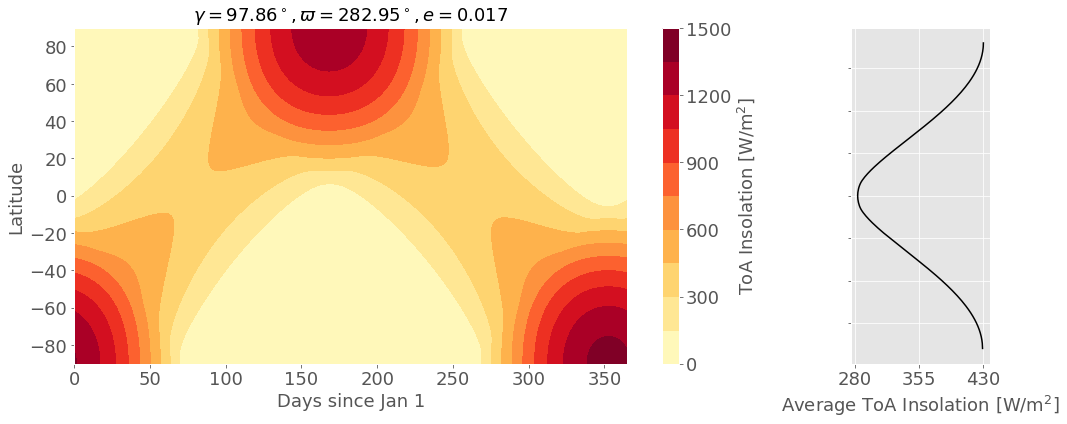

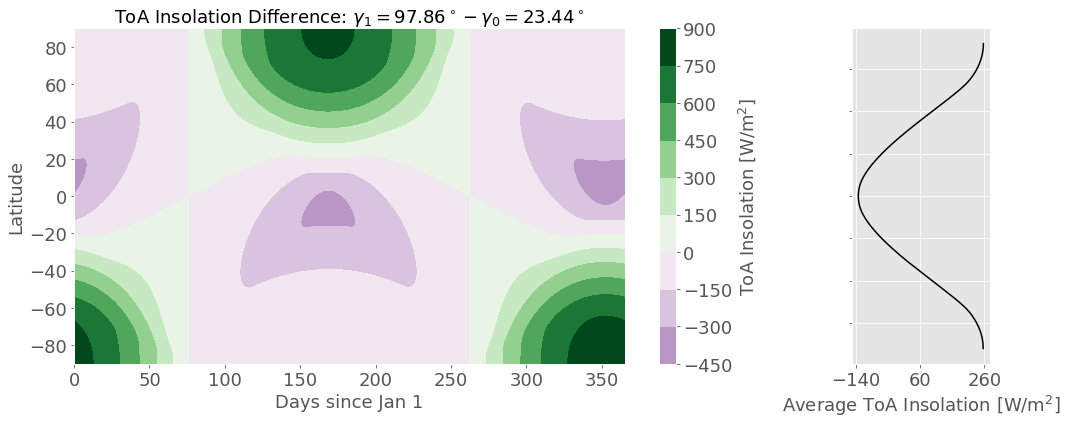

In [8]:
# now change obliquity to 60.0°
gamma3 = 60.0
pi0 = 282.95
e0 = 0.017

# ndays, nlats
ndays = 365
nlats = 180

F4 = calc_day_lat_insolation(ndays,nlats,gamma3,pi0,e0)
plot_day_lat_insolation(ndays,nlats,F4,'YlOrRd',
 '$\gamma = 60.0^\circ, \\varpi = 282.95^\circ, e = 0.017$')
plot_day_lat_insolation(ndays,nlats,F4-F0,'PRGn',
 'ToA Insolation Difference: $\gamma_1 = 60.0^\circ - \gamma_0 = 23.44^\circ$')

# now change obliquity to 97.86°
gamma4 = 97.86
pi0 = 282.95
e0 = 0.017

# ndays, nlats
ndays = 365
nlats = 180

F5 = calc_day_lat_insolation(ndays,nlats,gamma4,pi0,e0)
plot_day_lat_insolation(ndays,nlats,F5,'YlOrRd',
 '$\gamma = 97.86^\circ, \\varpi = 282.95^\circ, e = 0.017$')
plot_day_lat_insolation(ndays,nlats,F5-F0,'PRGn',
 'ToA Insolation Difference: $\gamma_1 = 97.86^\circ - \gamma_0 = 23.44^\circ$')

Now changing the obliquity to $\gamma = 60.0 ^\circ$ and making the same plots you can see that if the obliquity is large enough we can switch into a new regime where the maximum annually averaged insolation occurs at the poles instead of the equator. The $\gamma = 60 ^\circ$ case is at this intermediate because the minimum insolation is occuring around $25 ^\circ$ N and S. But if we move to a case where the obliquity is very close to $90 ^\circ$, like on Uranus which has obliquity $\gamma = 97.86 ^\circ$, we see that the annually averaged insolation maximum is at the poles and the minimum is at the equator.

Bonus: Question 7
We can write the insolation $F$ as a function of time of year ($t$), latitude ($\phi$), and parameters describing Earth's orbit ($\varpi$, $\gamma$, and $e$) as in (3.13) from the book to first order in eccentricity:
$$F = S_0 (1 + 2e \cos M) \overline{\cos\theta}$$
We are interested in how this insolation depends on obliquity, $\gamma$. Therefore, we only need consider the $\cos\theta$ factor.
$$\overline{\cos\theta} = \frac{1}{\pi} [ \eta_d \sin\phi \sin\delta + \cos\phi \cos\delta \sin\eta_d]$$
We additionally are also only interested in how the insolation ~at the equator~ depends on obliquity. The equator has latitude $\phi=0$, so $\sin\phi=0$ and $\cos\phi=1$. Also, we define the declination angle ($\delta$) by $\sin\delta = \sin\gamma \sin L_s$ and the sunrise/sunset hour angle ($\eta_d$) by $\cos\eta_d = -\tan \phi \tan \delta$. Similarly, for $\phi=0$, $\tan\phi=0$, so $\cos\eta_d = 0$, or $\sin\eta_d = 1$.
$$\overline{\cos\theta} = \frac{\cos\delta}{\pi}$$
We know that $\cos^2 x + \sin^2 x = 1$, so
$$\cos\delta = \sqrt{1 - \sin^2\delta} = \sqrt{1 - \sin^2 \gamma \sin^2 L_s}$$$$\cos\delta = f(\gamma) = \sqrt{1-\alpha \sin^2\gamma}$$
Finally, assuming that $\gamma << 1$, we can do a Taylor expansion of $\cos\delta$ and keep only the first order terms in $\gamma$.
$$\cos\delta \approx f(0) + \gamma \cdot \left. \frac{\partial f}{\partial \gamma} \right|_{\gamma=0} = 1 + \gamma \cdot \left. \left( \frac{1}{2} (1-\alpha \sin^2\gamma)^{-1/2} (-\alpha)(2\sin\gamma\cos\gamma) \right) \right|_{\gamma=0} = 1 + \gamma \cdot 0 = 1$$
Therefore, to first-order, for small $\gamma$, at the equator, the insolation is independent on obliquity:
$$F(\phi=0) = \frac{S_0}{\pi} (1 + 2e \cos M)$$